This notebook contains steps to identify possible home bases from open field rodent data.

Home bases will be identified by: 
    
    1) importing data files including a structure of type -v7.3 and an excel file from deep lab cut post process 
    
    2) indexing the coordinates into conditions from time stamps or high likelihood
    
    3) Generating an occupancy matrix to plot the occupancy map 
    
    4) Smoothing data to identify home bases
    
    5) Plotting the paths and occupancy maps 

In order to run, this notebook utilizes the Image Processing Toolbox, as well as some user-defined functions
added below from  [ephystools github.](https://github.com/ryanharvey1/ephys_tools)

In [4]:
%Adding user-defined functions from github
addpath('C:\Users\kjame\Desktop\CODE FOR CLARK LAB\ephys_tools')
startup

# a) Data Structure 
###  1) Import Data

In [5]:
%This section is for importing the data file of type (-v7.3) used with ephystools github
data=load('C:\Users\kjame\Desktop\CODE FOR CLARK LAB\LB07_S20190603151106.mat');

  

This is the structure used with ephystools github. This notebook will use events, recording the time stamps in which 
conditions began and ended, frames, which records (x,y) coordinates as well as their likelihood, sample rate, which 
defines the number of recordings per second, and maze size. 

In [6]:
data



data = 

  struct with fields:

             BasicLoco: [1x1 struct]
                Spikes: {78x1 cell}
             ThPrecess: {78x2 cell}
               avgwave: {78x1 cell}
              basename: '2019-06-03_15-11-06'
            binned_vel: {[7242x1 double]  [5664x1 double]}
        date_processed: '01-Apr-2020'
                events: [2x2 double]
                frames: [81233x5 double]
              hdTuning: {78x2 cell}
    hdTuning_corrected: {78x2 cell}
                   ifr: {78x2 cell}
                   lfp: [1x1 struct]
          maze_size_cm: [76.5000 76.5000]
             mazetypes: {'Cylinder'  'Cylinder'}
              measures: [78x66x2 double]
                offset: 1.8802e+09
             openfield: {[1x1 struct]  [1x1 struct]}
                   rat: 'LB07'
               ratemap: {78x2 cell}
            samplerate: 30
             sessionID: 'S20190603151106'
      session_duration: [24.1194 18.9872]
           session_idx: [156x1 double]
          session_p

### 2) Index Coordinates
This section plots (x,y) coordinates from data frames, separating the coordinates into condition 1 and 2 via their time 
stamps, as defined by events. Once the frames are sorted into conditions, they are plotted individually using the subplot
function. 

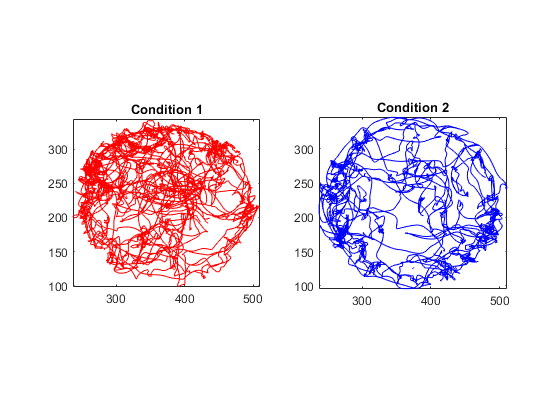

In [7]:

cond1=data.events(1,1)<data.frames(:,1) & data.frames(:,1)<=data.events(2,1);
cond2=data.events(1,2)<data.frames(:,1) & data.frames(:,1)<=data.events(2,2);
subplot(1,2,1)
plot(data.frames(cond1,2), data.frames(cond1,3),'r')
title('Condition 1')
axis image
subplot(1,2,2)
plot(data.frames(cond2,2), data.frames(cond2,3),'b')
title('Condition 2')
axis image


### 3) Create Occupancy Matrix
This section creates individual occupancy maps for each condition. 

In [10]:
%cond1
    nBinsxC1 = round(76.5/3); nBinsyC1 = round(76.5/3);
    MinYC1 = min(data.frames(cond1,3));
    MaxYC1 = max(data.frames(cond1,3));
    MinXC1 = min(data.frames(cond1,2));
    MaxXC1 = max(data.frames(cond1,2));
    edgesC1{1} = linspace(MinYC1, MaxYC1, nBinsyC1+1);
    edgesC1{2} = linspace(MinXC1, MaxXC1, nBinsxC1+1);
    
    %create occupancy matrix
    OmatrixC1 = hist3([data.frames(cond1,3) data.frames(cond1,2)],'Edges',edgesC1);
    
%cond2
    nBinsxC2 = round(76.5/3); nBinsyC2 = round(76.5/3);
    MinYC2 = min(data.frames(cond2,3));
    MaxYC2 = max(data.frames(cond2,3));
    MinXC2 = min(data.frames(cond2,2));
    MaxXC2 = max(data.frames(cond2,2));
    edgesC2{1} = linspace(MinYC2, MaxYC2, nBinsyC2+1);
    edgesC2{2} = linspace(MinXC2, MaxXC2, nBinsxC2+1);
    
    %create occupancy matrix
    OmatrixC2 = hist3([data.frames(cond2,3) data.frames(cond2,2)],'Edges',edgesC2);

### 4) Smooth Occupancy Matrix
Each data set is plotted into a histogram and smoothed.

In [11]:
%cond1    
    %smooth occupancy matrix 
    OmatrixC1(end,:) = [];
    OmatrixC1(:,end) = [];
    occC1 = OmatrixC1/30;
    occC1(occC1==0)= NaN;  
    filtWidth = [5 5]; filtSigma = 1;
    imageFilter=fspecial('gaussian',filtWidth,filtSigma);
    smoothC1 = nanconv(occC1,imageFilter, 'nanout'); 
    
%cond2
    %smooth occupancy matrix
    OmatrixC2(end,:) = [];
    OmatrixC2(:,end) = [];
    occC2 = OmatrixC2/30;
    occC2(occC2==0)= NaN;  
    filtWidth = [5 5]; filtSigma = 1;
    imageFilter=fspecial('gaussian',filtWidth,filtSigma);
    smoothC2 = nanconv(occC2,imageFilter, 'nanout');
    

### 5) Plot Condition Data
This section uses a 3x2 Subplot to display the (x,y) coordinates, a smoothed occupancy map, and estimated home bases via
segment image function for each condition. 

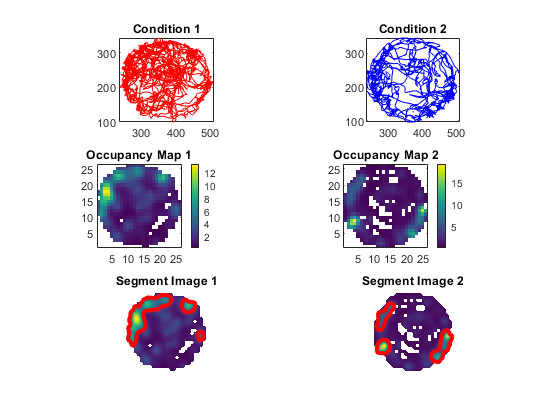

In [12]:
%Condtion 1 
subplot(3,2,1)
    plot(data.frames(cond1,2), data.frames(cond1,3),'r')
    title('Condition 1')
    axis image
    
%Condtion 2 
subplot(3,2,2)
    plot(data.frames(cond2,2), data.frames(cond2,3),'b')
    title('Condition 2')
    axis image
    
%Condition 1 Occupancy Map 
subplot(3,2,3)
    imAlpha=ones(size(smoothC1));
            imAlpha(isnan(smoothC1))=0;
            imagesc(smoothC1,'AlphaData',imAlpha);
    title('Occupancy Map 1')
    colorbar
    axis image
    axis xy
  
%Condition 2 Occupancy Map
subplot(3,2,4)
    imAlpha=ones(size(smoothC2));
            imAlpha(isnan(smoothC2))=0;
            imagesc(smoothC2,'AlphaData',imAlpha);
    title('Occupancy Map 2')
    colorbar
    axis image
    axis xy
  
    
subplot(3,2,5)
    segmentImage('map', smoothC1, 'figs', true);
    title('Segment Image 1')
    axis image
    axis xy
  
    
subplot(3,2,6)
    segmentImage('map', smoothC2, 'figs' , true);
    title('Segment Image 2')
    axis image
    axis xy

# b) Output of Deep Lab Cut Excel File
### 1) Import Data 
This section loads the excel file for the next data set, analyzing open field behavior. The excel file is stored into 
numbers only (num), header material only (txt), and all data (raw). The remainder of this notebook will focus on numbers
(num) only. 

In [16]:
path_to_files='C:\Users\kjame\Desktop\CODE FOR CLARK LAB\ephys_tools\Analysis';
excelFile= dir([path_to_files,'\**\*.xlsx']);
[num,txt,raw] = xlsread(excelFile.name);

### 2) Index Data for High Likelihood 
This section defines a logical index (idx) to include only coordinates with a likelihood, found in column 4, of .95 or 
greater. The coordinates are plotted with and without the index in pixel space. 

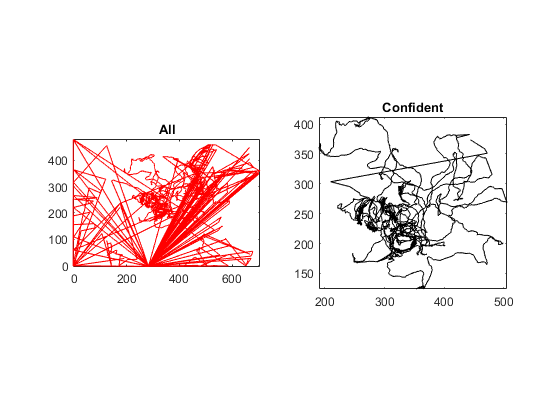

In [17]:
idx = num(:,4) >= .95;
subplot(1,2,1)
plot(num(:,2),num(:,3), 'r')
title('All')
axis image
subplot(1,2,2)
plot(num(idx,2), num(idx,3),'k')
title('Confident')
axis image


This section calls the transform coordinated function to translate the data into meaningful unit, in this case centimeters. 
Again, the comparison between all & confident data is plotted, now in centimeters. 

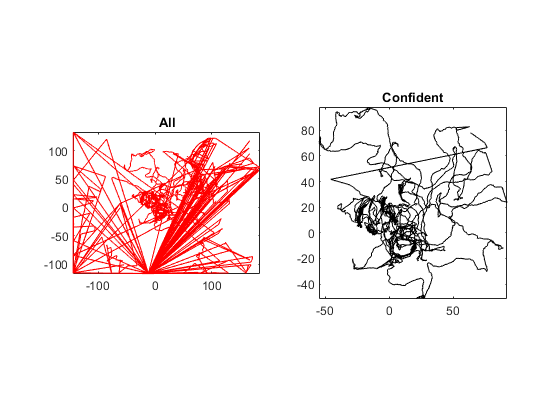

In [18]:

addpath(genpath('C:\Users\kjame\Desktop\CODE FOR CLARK LAB\ephys_tools\Behavior'))
[x,y] = transformCoordinates(202,525,91,418,28,num(:,2),num(:,3));

subplot(1,2,1)
plot(x,y, 'r')
title('All')
axis image
subplot(1,2,2)
plot(x(idx), y(idx),'k')
title('Confident')
axis image

### 3) Create Occupancy Matrix
This section creates an occupancy map for the confident coordinates. 

In [20]:
nBinsx = round(202/3); nBinsy= round(202/3);
MinY = min(y);
MaxY = max(y);
MinX = min(x);
MaxX = max(x);
edges{1} = linspace(MinY, MaxY, nBinsy+1);
edges{2} = linspace(MinX, MaxX, nBinsx+1);

%create occupancy matrix    
Omatrix = hist3([y x],'Edges',edges);

### 4) Smooth Occupancy Matrix 
The occupancy matrix of high likelihood coordinates is plotted into a histogram and smoothed. 

In [21]:
Omatrix(end,:) = [];
Omatrix(:,end) = [];
occ = Omatrix/30; 
occ(occ==0)= NaN; 
filtWidth = [5 5]; filtSigma = 1;
imageFilter=fspecial('gaussian',filtWidth,filtSigma);
smooth = nanconv(occ,imageFilter, 'nanout');

### 5) Plot Data 
This section uses the field diameter to plot the confident coordinates on the field. A loop is used to calculate
the total distance traveled via the distance formula.

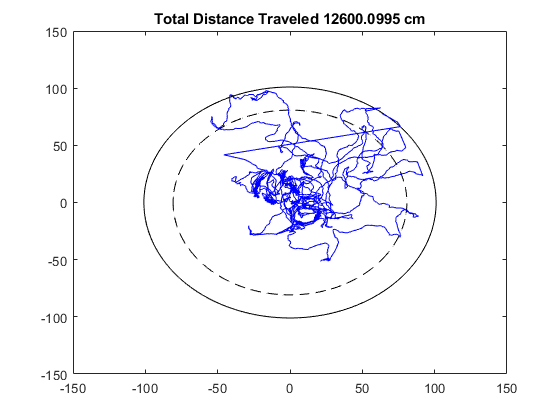

In [23]:
[x,y] = transformCoordinates(202,525,91,418,28,num(:,2),num(:,3));
fig=figure;fig.Color=[1 1 1];
    plot(sin(0:pi/360:2*pi)*(202/2),cos(0:pi/360:2*pi)*(202/2),'k')
    hold on; 
    plot((cos(linspace(-pi,pi,1000))+0)*(101*.8),(sin(linspace(-pi,pi,1000))+0)*(101*.8),'--k')
x=x(idx); 
y=y(idx); 
%find total distance traveled using distance formula 
pathDist=0;
i=1;
while( i<length(x))
        pathDist= pathDist + sqrt((x(i+1)-x(i))*(x(i+1)-x(i)) + (y(i+1)-y(i))*(y(i+1)-y(i)) ); 
      i= i+1; 
end 
plot(x, y,'b') 
title(['Total Distance Traveled ', num2str(pathDist), ' cm'])

This section generates a subplot including the previous Total Distance Traveled figure, the occupancy map, and 
estimated home bases by calling segment image function.  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



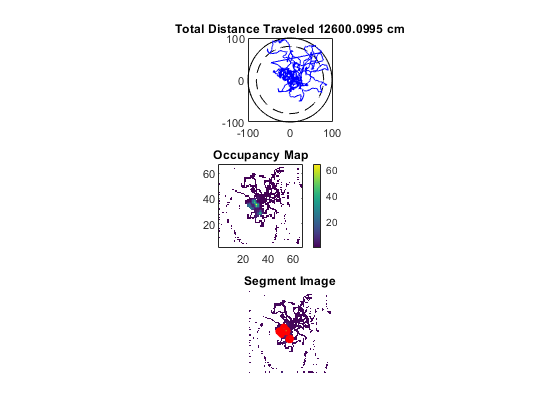

In [24]:
fig=figure;fig.Color=[1 1 1];
subplot(3,1,1)
plot(sin(0:pi/360:2*pi)*(202/2),cos(0:pi/360:2*pi)*(202/2),'k')
hold on; 
plot((cos(linspace(-pi,pi,1000))+0)*(101*.8),(sin(linspace(-pi,pi,1000))+0)*(101*.8),'--k')
plot(x, y,'b') 
title(['Total Distance Traveled ', num2str(pathDist), ' cm'])
axis image
    
subplot(3,1,2)
imAlpha=ones(size(smooth));
    imAlpha(isnan(smooth))=0;
    imagesc(smooth,'AlphaData',imAlpha);
title('Occupancy Map')
colorbar
axis image
axis xy
    
subplot(3,1,3)
segmentImage('map', smooth, 'figs', true)
title('Segment Image')
axis image
axis xy


This section contains a second method to import the data file, originally in the csv format, using the MATLAB functions
fopen, textscan, and fclose. This method is more suited for cycling through multiple csv files at a time, but is still 
a functional option for importing the open field behavior data set. 

In [13]:

path_to_files='C:\Users\kjame\Desktop\CODE FOR CLARK LAB\ephys_tools\Analysis';
file = dir([path_to_files,'\**\*.csv']);
%load header
    fileID = fopen(file.name,'r');
    dataArray = textscan(fileID, '%s%s%s%s%s%s%s%s%s%s%s%s%s%[^\n\r]',...
        2,'Delimiter',',', 'TextType', 'string', 'HeaderLines',...
        1, 'ReturnOnError', false, 'EndOfLine', '\r\n');
    fclose(fileID);
    header = [dataArray{1:end-1}];
    clearvars fileID dataArray ans;    
% load data
fileID = fopen(file.name,'r');
    dataArray = textscan(fileID, '%f%f%f%f%f%f%f%f%f%f%f%f%f%[^\n\r]',...
        'Delimiter', ',','TextType', 'string', 'EmptyValue', NaN,...
        'HeaderLines' ,3,'ReturnOnError', false, 'EndOfLine', '\r\n');
    fclose(fileID);
    tsxy= [dataArray{1:end-1}];
    clearvars fileID dataArray ans